# About
* Chapter 5 of Allen Downey's Think Stats 2nd editon
* Includes key concepts and exercises

# 5. Modeling distributions

* Distributions are either empirical or analytic
    * the latter is characterized by a CDF that is a mathematical function
* Analytic distributions can be used to model empirical distributions. In this context, a model is a simpli cation that leaves out unneeded details.

# 5.1 The exponential distrbution
* The CDF of an exponential distribution is
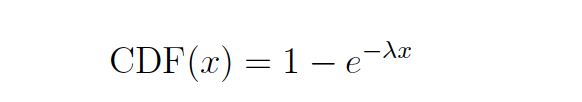
* the parameter lambda determines the shape of the distribution
* Fig 5.1 demonstrates how the shape of the CDF curve changes with lambda


## When do we use exponential distributions?
* Usually when we look at a series of events and measure the times between events (i.e. interarrival times)
* If the events are equally likely at any time, the distribution of interarrival times tends to look like an exponential distribution 

## How can we tell if it an exponential distribution?
* We cn plot the complementary CDF, which is `1-CDF(x)`, on a log-y scale
* For data from an exponential distribution, the result is a straight line
* If you plot the complementary CDF (CCDF) of a dataset that you think is exponential, you expect to see a function like:


* So on a log-y scale, the CCDF is a straight line with slope `-lambda`
* The parameter, lambda , can be interpreted as a rate; that is, the number of events that occur, on average, in a unit of time. 
    * In one example, 44 babies are born in 24 hours, so the rate is   = 0:0306 births per minute. The mean of an exponential distribution is 1= , so the mean time between births is 32.7 minutes.
    
    
# 5.2 The Normal Distribution
* also called Gaussian
* Fairly ubiquitous
* It is characterized by two parameters: the mean (miu) and the standard deviation (sigma)
* The normal distribution with   = 0 and   = 1 is called the standard normal distribution


# 5.3 Normal probability plot

* For the exponential distribution, and a few others, there are simple transformations we can use to test whether an analytic distribution is a good model for a dataset.
* For the normal distribution there is no such transformation, but there is an alternative called a normal probability plot

## The easy way of generating a normal probability plot
> 1. Sort the values in the sample
> 2. From s tandard normal distirbution ( miu = 0, sigma =1), generate a random sample with the same size as the sample and sort it
> 3. Plot the sorted vales from the sample versus the random values.
> 4. If the distribution of the sample is approximately normal, the result is a
straight line with intercept mu and slope sigma


# 5.4 The lognormal distribution
* If the logarithms of a set of values have a normal distribution, the values have a lognormal distribution. 
* The CDF of the lognormal distribution is the same as the CDF of the normal distribution, with logx substituted for x.

* The parameters are usually denoted miu and sigma
    * But these parameters are <b> NOT </b> the mean and standard deviation
        * Mean of a lognormal distribution: exp( miu + (sigma^2)/2)
        * The standard deviation....is ugly
        
* If a sample is approximately lognormal and you plot its CDF on a log-x scale, it will have the characteristic shape of a normal distribution. 
* To test how well the sample  ts a lognormal model, you can make a normal probability plot using the log of the values in the sample.

# Exercises

## Exercise 5.1
> * In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters  miu = 178 cm and  sigma = 7.7 cm for men, and miu= 163 cm and  sigma = 7:3 cm for women.
> * In order to join Blue Man Group, you have to be male between 5'10" and 6'1" 
> * What percentage of the U.S. male population is in this range? Hint: use scipy.stats.norm.cdf.

In [3]:
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

In [4]:
## for the men's parameters
mu = 178
sigma = 7.7
male_dist = scipy.stats.norm(loc=mu, scale=sigma)
type(male_dist)

scipy.stats._distn_infrastructure.rv_frozen

In [6]:
# frozen distribution -> can compute mean and stdev
male_dist.mean(), male_dist.std()

(178.0, 7.7)

In [8]:
# evaluate cdf
male_dist.cdf(mu-sigma)

0.1586552539314574

* ~16% of people are beyond one stdev below the mean

In [12]:
# How many peopl betwen 5'10 and 6'1?
# 5'10 ~ 178
# 6'1 ~ 185
low = male_dist.cdf(178)
high = male_dist.cdf(185)
low,high,high-low

(0.5, 0.818348929556551, 0.31834892955655103)

## Exercise 5.3 
> * The Weibull distribution is a generalization of the exponential distribution that comes up in failure analysis (see http://wikipedia.org/wiki/Weibull_distribution). 
> * Its CDF is CDF(x) = 1 - e^(-(x/lambda)^k)
> * Can you find a transformation that makes a Weibull distribution look like a straight line? 
> * What do the slope and intercept of the line indicate?
> Use random.weibullvariate to generate a sample from a Weibull distribu- tion and use it to test your transformation.

CDF(x) = 1 - exp^-(x^k)
taking a log of the RHS
logCDF(x) = k/lambda log (-x/lambda)

* Weibull distribution has the general form
> F(t) = 1 - exp(-(t/a)^b)
    * in our case, t=x, a=lambda, b=k
* let (x/lambda)^k be z
    * G(z) = 1-exp(-z)

* Double logarithmic transformative and rearrangment changes the above to
> ln(t) = ln(a) + (1/b)ln(ln(1/(1-F))
* slope = 1/b = 1/lambda
* intercept = ln(a)